![UNED Logo][uned_logo_ref]
# Visualización de Datos - Caso Práctico
## Adrián José Zapater Reig
---
[uned_logo_ref]:
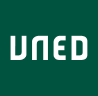

#### Objetivo:
Para definir cuál es el objetivo de la visualización debemos responder a dos preguntas:

> **¿Qué queremos trasmitir?**<br>
> Queremos trasmitir el impacto que tienen elementos cómo la fecha (festivos y días especiales) y bajadas de precio (MarkDown) sobre las ventas semanales de 45 tiendas de Walmart entre el 5/2/2010 y el 26/10/2012.

> **¿Qué efecto queremos lograr?**<br>
> El efecto que queremos lograr es tanto analizar patrones como argumentar/justificar estos patrones.  

En definitiva, uniendo las dos respuestas anteriores, el objetivo de la visualización de este caso práctico es:  
Mostrar la relación entre la fecha y las bajadas de precio (MarkDown) sobre las ventas semanales de 45 tiendas de Walmart entre el 5/2/2010 y el 26/10/2012 y argumentar los resultados.

---


### Fuente de Datos
La fuente de datos que se va a utilizar es la proporcionada por el equipo docente. Esta puede ser descargada desde el [siguiente enlace](https://www.kaggle.com/bletchley/course-material-walmart-challenge).<br>

#### Descripción:
La fuente de datos contiene: <br>
> las ventas por departamento de 45 tiendas de Walmart que han sido anonimizadas y datos adicionales como el precio del combustible y la temperatura entre otros.

#### Estructura:
La estructura de los datos es la siguiente:

- Store: el número de la tienda
- Department: el número de departamento
- Date: Fecha de la información.
- Weekly_Sales: ventas para el departamento dado en la tienda dada 
- IsHoliday: si la semana es una semana especial de vacaciones
- Temperature: temperatura promedio en la región
- Fuel_Price: precio del combustible en la región
- MarkDown1-5: datos anonimizados relacionados con las promociones que se están llevando a cabo. Los datos de MarkDown solo están disponibles desde de noviembre de 2011 y no están disponibles para todas las tiendas. Cuando falta un valor se marca como NA
- CPI: el índice de precios al consumidor
- Unemployment: la tasa de desempleo
- Type: una descripción del tipo de tienda que es. Existen tres tipos: A, B y C.
- Size: número de metros cuadrados de la tienda.
---

### Iteración 0:
#### 1 - Preprocesado:

In [2]:
import os

# Ruta al fichero de datos.
path_to_file = os.path.join('.','src','test.csv')

In [3]:
import pandas as pd

data = pd.read_csv(path_to_file)

 Comenzamos el primer preprocesado creando varias visualizaciones que nos ayuden a conocer mejor con qué tipo de datos estamos trabajando.


In [9]:
# REF1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139119 entries, 0 to 139118
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         139119 non-null  int64  
 1   Dept          139119 non-null  int64  
 2   Date          139119 non-null  object 
 3   IsHoliday     139119 non-null  bool   
 4   Temperature   139119 non-null  float64
 5   Fuel_Price    139119 non-null  float64
 6   MarkDown1     50161 non-null   float64
 7   MarkDown2     37016 non-null   float64
 8   MarkDown3     45570 non-null   float64
 9   MarkDown4     44936 non-null   float64
 10  MarkDown5     50403 non-null   float64
 11  CPI           139119 non-null  float64
 12  Unemployment  139119 non-null  float64
 13  Type          139119 non-null  object 
 14  Size          139119 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 15.0+ MB


Como podemos ver en la celda de arriba (`REF1`), nuestra fuente de datos contiene 139119 registros con 15 columnas. La mayor parte de las columnas son numéricas, 3 de precision simple y 9 de doble precisón, una es booleana y las 2 restantes están categorizadas como objeto.

Las mayoría de las columnas no tienen valores nulos o NaN a excepción de las 5 columnas de MarkDown, que como hemos indicado en la descripción de la fuente de dagtos, sólo contienen información entre el 5/2/2010 y el 26/10/2012. Más adelante tendremos que decidir cómo tratar los valores no informados o si vamos a descartar los registros que no los contengan.

In [6]:
# REF2
data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,B,120653
2,38,4,2011-05-27,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,C,39690
3,29,33,2010-03-12,False,43.43,2.805,NaN,NaN,NaN,NaN,NaN,131.784000,10.064,B,93638
4,13,52,2010-10-29,False,45.12,2.841,NaN,NaN,NaN,NaN,NaN,126.436419,7.795,A,219622


La celda `REF2` muestra una extracción de 5 registros. De esta extracción podemos 

In [8]:
data.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,139119.000000,139119.000000,139119.000000,139119.000000,50161.000000,37016.000000,45570.000000,44936.000000,50403.000000,139119.000000,139119.000000,139119.000000
mean,22.215528,44.207894,60.042182,3.362502,7247.106823,3367.157260,1483.652604,3390.333933,4607.926737,171.190058,7.944434,136723.535441
std,12.791743,30.468558,18.450840,0.458334,8364.196211,9454.875819,9772.352647,6338.190217,5762.340423,39.156302,1.853472,60936.648098
min,1.000000,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,46.630000,2.935000,2229.520000,42.160000,5.200000,500.910000,1880.310000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,62.010000,3.459000,5307.810000,193.900000,24.940000,1479.910000,3332.990000,182.318780,7.866000,140167.000000
75%,33.000000,72.000000,74.250000,3.738000,9160.250000,1958.520000,105.090000,3578.400000,5556.150000,212.403576,8.567000,202505.000000
max,45.000000,99.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


Referencias:
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/discussion/8033
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/discussion/8028
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/discussion/7670